# Experimentación

En este documento, se realizan los experimentos para mostrar los resultados de entrenar al modelo implementado en MLP.cpp y en main.cpp

## Librerías

In [1]:
import json
from os import getcwd
from sklearn import metrics
import matplotlib.pyplot as plt
import os
import pywt
import json
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image
from os import getcwd, listdir
from os.path import join
import random

## Compilación de la clase MLP
La siguiente línea de comando, compilará los archivos en C++ *main* y *MLP*. En *main.cpp* se procesa la entrada, acciones sobre el modelo y la salida, y en el archivo *MLP.cpp* se implementa el *Multilayer Perceptron*. Se generará el archivo ejecutable *main.out*, para ser usado en la experimentación. En caso no se tenga instalada la librería jsoncpp, puede instalarla con el comando *sudo apt-get install libjsoncpp-dev*

In [5]:
os.system('g++ main.cpp -o main.out -ljsoncpp')

0

En la carpeta *encodes* debemos guardar la base de datos que ingresará al modelo en formato json y con los campos indicados en el informe. Luego, con la siguiente línea de comandos, crearemos el MLP, lo entrenamos y entregará sus resultados (errores de entrenamiento y validación, y salidas para cada uno de los datos ingresados en entrenamiento, validación y testeo) en la carpeta *errors* en un archivo *json* en el formato indicado en el informe.

        <in.txt> <out.txt> <layers> 

        <neurons_in_layer(1)> <neurons_in_layer(2)> ... <neurons_in_layer(layers)>
        
        <activation_function> <epoch> <alpha> <debug> <seed>

## Preprocesamiento
El preprocesamiento de los datos se realiza en el archivo *img_encoder.ipynb*, el cual genera los archivos *json* en la carpeta *encodes* a partir de la base de datos.

Variales globales necesarias para la experimentación.

In [2]:
PATH = getcwd() 
PATH_ERR = PATH + "/errors"
PATH_DAT = PATH + "/encodes"

## Clase *ErrorViewer*
Esta clase mostrará las gráficas de errores tanto en entrenamiento como en validación, y procesará las salidas obtenidas por el modelo para cada dato en entrenamiento, validación y testeo, con el fin de obtener la presición del modelo entrenado.

In [3]:
class ErrorViewer:

    def __init__(self, file_label: str):
        self.err_keys = ['errors_training', 'errors_validation']
        self.out_keys = ['output_testing', 'output_training', 'output_validation']
        if not file_label.endswith(".json"):
            file_label += ".json"
        self.err_info = json.load(open(PATH_ERR + "/" + file_label))
        self.file_label = file_label

    def calc_error(self):
        print(f"[ErrorViewer]: Se van a graficar los datos de '{self.file_label}'.")
        plt.plot(self.err_info[self.err_keys[0]], label="Training")
        plt.plot(self.err_info[self.err_keys[1]], label="Validation")
        plt.legend()
        plt.xlabel("Epoch")
        plt.ylabel("Error")
        plt.show()

    def perf_analysis(self, data_label: str):
        print(f"[ErrorViewer]: Se van a clasificar los datos de '{data_label}'.")
        if not data_label.endswith(".json"):
            data_label += ".json"
        path_to_data = PATH_DAT + "/" + data_label
        data_info = json.load(open(path_to_data))
        self.__calc_stats(data_info)

    def __calc_stats(self,data_info: dict):
        class_labels = ["Test", "Train", "Validation"]
        real_classes = [data_info[cl]["Classes"] for cl in class_labels]
        pred_classes = [self.err_info[cl] for cl in self.out_keys]
        curr_class = 0
        for o,c in zip(pred_classes, real_classes):
            tn, fn, fp, tp = 0,0,0,0
            pred_values = [tn,fn,fp,tp]
            for y_pred,y_real in zip(o,c):
                pred_class = max(y_pred)
                y_pred = [int(x==pred_class) for x in y_pred]
                pred_iter = metrics.confusion_matrix(y_real, y_pred).ravel()
                pred_values = [x + x_iter for x,x_iter in zip(pred_values, pred_iter)]
            tn, fn, fp, tp = pred_values
            accuracy = (tp + tn) / (tp + fp + fn + tn) * 100.0
            precision = tp  / (tp + fp) * 100.0
            recall = tp / (tp + fn) * 100.0
            f1_score = 2 * (recall * precision) / (recall + precision)
            print(f"[ErrorViewer] On {class_labels[curr_class]}:")
            print(f"\t[ErrorViewer] ACCURACY = {round(accuracy,3)} %")
            print(f"\t[ErrorViewer] PRECISION = {round(precision,3)} %")
            print(f"\t[ErrorViewer] RECALL = {round(recall,3)} %")
            print(f"\t[ErrorViewer] F1 SCORE = {round(f1_score,3)} %")
            print(f"\t[ErrorViewer] Values are tn,fn,fp,tp = {pred_values} %")
            curr_class += 1

## Experimentos

El *dataset* de los archivos de la carpeta *encodes* consta de 73 características por dato, y 10 clases de salida.

### Experimento 1: función sigmoidea
#### Experimento 1.1: 
Se crea un modelo MLP de una capa de 35 neuronas.

In [19]:
FILE_IN = 'img_encodings_1.json'
FILE_OUT = 'error_11'
NEURONS = '1 35'
ACT_FUNCTION = 'sigmoid'
EPOCH = '500'
LEARNING_COEF = '0.0085'
SEED = '1'

In [ ]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

[ErrorViewer]: Se van a graficar los datos de 'error_11_sigmoid.json'.


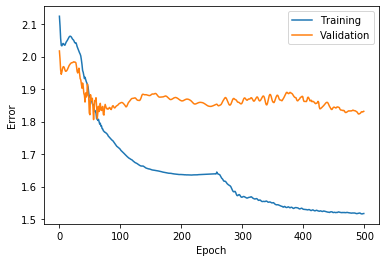

[ErrorViewer]: Se van a clasificar los datos de 'img_encodings_1.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 82.381 %
	[ErrorViewer] PRECISION = 6.757 %
	[ErrorViewer] RECALL = 5.952 %
	[ErrorViewer] F1 SCORE = 6.329 %
	[ErrorViewer] Values are tn,fn,fp,tp = [687, 79, 69, 5] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 93.714 %
	[ErrorViewer] PRECISION = 70.598 %
	[ErrorViewer] RECALL = 63.814 %
	[ErrorViewer] F1 SCORE = 67.035 %
	[ErrorViewer] Values are tn,fn,fp,tp = [5807, 241, 177, 425] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 88.072 %
	[ErrorViewer] PRECISION = 38.889 %
	[ErrorViewer] RECALL = 33.735 %
	[ErrorViewer] F1 SCORE = 36.129 %
	[ErrorViewer] Values are tn,fn,fp,tp = [703, 55, 44, 28] %


In [20]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

#### Experimento 1.2: 
Se crea un modelo MLP de dos capas, de 50 y 20 neuronas respectivamente.

In [82]:
FILE_IN = 'img_encodings_1.json'
FILE_OUT = 'error_12'
NEURONS = '2 50 20'
ACT_FUNCTION = 'sigmoid'
EPOCH = '130'
LEARNING_COEF = '0.0055'
SEED = '1'

In [83]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

sigmoid finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_12_sigmoid.json'.


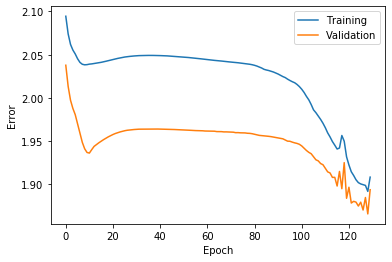

[ErrorViewer]: Se van a clasificar los datos de 'img_encodings_1.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 83.571 %
	[ErrorViewer] PRECISION = 13.514 %
	[ErrorViewer] RECALL = 11.905 %
	[ErrorViewer] F1 SCORE = 12.658 %
	[ErrorViewer] Values are tn,fn,fp,tp = [692, 74, 64, 10] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 86.632 %
	[ErrorViewer] PRECISION = 31.395 %
	[ErrorViewer] RECALL = 28.421 %
	[ErrorViewer] F1 SCORE = 29.834 %
	[ErrorViewer] Values are tn,fn,fp,tp = [5572, 476, 413, 189] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 85.422 %
	[ErrorViewer] PRECISION = 23.611 %
	[ErrorViewer] RECALL = 20.482 %
	[ErrorViewer] F1 SCORE = 21.935 %
	[ErrorViewer] Values are tn,fn,fp,tp = [692, 66, 55, 17] %


In [84]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

#### Experimento 1.3: 
Se crea un modelo MLP de cuatro capas, de 60, 45, 30 y 15 neuronas respectivamente.

In [97]:
FILE_IN = 'img_encodings_1.json'
FILE_OUT = 'error_13'
NEURONS = '4 60 45 30 15'
ACT_FUNCTION = 'sigmoid'
EPOCH = '190'
LEARNING_COEF = '0.0055'
SEED = '1'

In [98]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

sigmoid finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_13_sigmoid.json'.


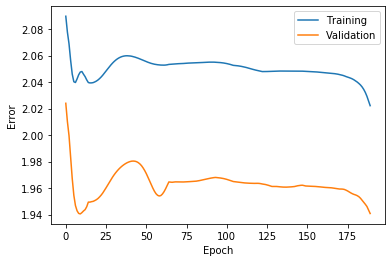

[ErrorViewer]: Se van a clasificar los datos de 'img_encodings_1.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 83.095 %
	[ErrorViewer] PRECISION = 10.811 %
	[ErrorViewer] RECALL = 9.524 %
	[ErrorViewer] F1 SCORE = 10.127 %
	[ErrorViewer] Values are tn,fn,fp,tp = [690, 76, 66, 8] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 85.158 %
	[ErrorViewer] PRECISION = 23.256 %
	[ErrorViewer] RECALL = 21.053 %
	[ErrorViewer] F1 SCORE = 22.099 %
	[ErrorViewer] Values are tn,fn,fp,tp = [5523, 525, 462, 140] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 85.181 %
	[ErrorViewer] PRECISION = 22.222 %
	[ErrorViewer] RECALL = 19.277 %
	[ErrorViewer] F1 SCORE = 20.645 %
	[ErrorViewer] Values are tn,fn,fp,tp = [691, 67, 56, 16] %


In [99]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

### Experimento 2: función tangente hiperbólica
#### Experimento 2.1: 
Se crea un modelo MLP de una capa de 20 neuronas.

In [330]:
FILE_IN = 'img_encodings_2.json'
FILE_OUT = 'error_21'
NEURONS = '1 20'
ACT_FUNCTION = 'tanh'
EPOCH = '150'
LEARNING_COEF = '0.0001'
SEED = '1'

In [331]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

tanh finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_21_tanh.json'.


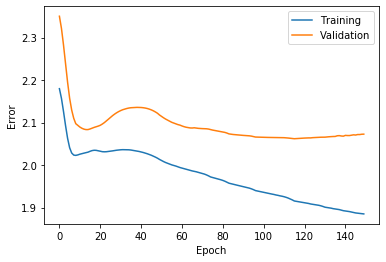

[ErrorViewer]: Se van a clasificar los datos de 'img_encodings_2.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 83.69 %
	[ErrorViewer] PRECISION = 14.667 %
	[ErrorViewer] RECALL = 13.095 %
	[ErrorViewer] F1 SCORE = 13.836 %
	[ErrorViewer] Values are tn,fn,fp,tp = [692, 73, 64, 11] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 85.594 %
	[ErrorViewer] PRECISION = 25.378 %
	[ErrorViewer] RECALL = 22.707 %
	[ErrorViewer] F1 SCORE = 23.968 %
	[ErrorViewer] Values are tn,fn,fp,tp = [5541, 514, 444, 151] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 85.422 %
	[ErrorViewer] PRECISION = 25.641 %
	[ErrorViewer] RECALL = 24.096 %
	[ErrorViewer] F1 SCORE = 24.845 %
	[ErrorViewer] Values are tn,fn,fp,tp = [689, 63, 58, 20] %


In [332]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

#### Experimento 2.2: 
Se crea un modelo MLP de dos capas, de 10 y 10 neuronas respectivamente.

In [324]:
FILE_IN = 'img_encodings_2.json'
FILE_OUT = 'error_22'
NEURONS = '2 10 10'
ACT_FUNCTION = 'tanh'
EPOCH = '4'
LEARNING_COEF = '0.001'
SEED = '1'

In [325]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

tanh finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_22_tanh.json'.


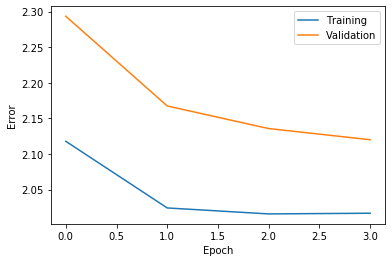

[ErrorViewer]: Se van a clasificar los datos de 'img_encodings_2.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 82.262 %
	[ErrorViewer] PRECISION = 6.667 %
	[ErrorViewer] RECALL = 5.952 %
	[ErrorViewer] F1 SCORE = 6.289 %
	[ErrorViewer] Values are tn,fn,fp,tp = [686, 79, 70, 5] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 83.429 %
	[ErrorViewer] PRECISION = 13.277 %
	[ErrorViewer] RECALL = 11.88 %
	[ErrorViewer] F1 SCORE = 12.54 %
	[ErrorViewer] Values are tn,fn,fp,tp = [5469, 586, 516, 79] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 82.048 %
	[ErrorViewer] PRECISION = 7.692 %
	[ErrorViewer] RECALL = 7.229 %
	[ErrorViewer] F1 SCORE = 7.453 %
	[ErrorViewer] Values are tn,fn,fp,tp = [675, 77, 72, 6] %


In [326]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

#### Experimento 2.3: 
Se crea un modelo MLP de cuatro capas, de 10, 10, 10 y 10 neuronas respectivamente.

In [327]:
FILE_IN = 'img_encodings_2.json'
FILE_OUT = 'error_23'
NEURONS = '4 10 10 10 10'
ACT_FUNCTION = 'tanh'
EPOCH = '8'
LEARNING_COEF = '0.001'
SEED = '1'

In [328]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

tanh finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_23_tanh.json'.


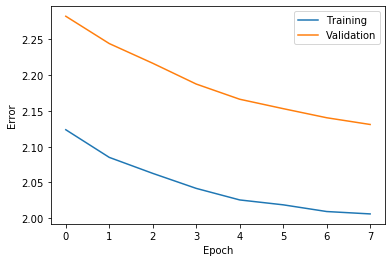

[ErrorViewer]: Se van a clasificar los datos de 'img_encodings_2.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 83.214 %
	[ErrorViewer] PRECISION = 12.0 %
	[ErrorViewer] RECALL = 10.714 %
	[ErrorViewer] F1 SCORE = 11.321 %
	[ErrorViewer] Values are tn,fn,fp,tp = [690, 75, 66, 9] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 83.669 %
	[ErrorViewer] PRECISION = 14.622 %
	[ErrorViewer] RECALL = 13.083 %
	[ErrorViewer] F1 SCORE = 13.81 %
	[ErrorViewer] Values are tn,fn,fp,tp = [5477, 578, 508, 87] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 82.771 %
	[ErrorViewer] PRECISION = 11.538 %
	[ErrorViewer] RECALL = 10.843 %
	[ErrorViewer] F1 SCORE = 11.18 %
	[ErrorViewer] Values are tn,fn,fp,tp = [678, 74, 69, 9] %


In [329]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

### Experimento 3: función relu
#### Experimento 3.1: 
Se crea un modelo MLP de una capa de 35 neuronas.

In [339]:
FILE_IN = 'img_encodings_3.json'
FILE_OUT = 'error_31'
NEURONS = '1 35'
ACT_FUNCTION = 'relu'
EPOCH = '200'
LEARNING_COEF = '0.000025'
SEED = '1'

In [340]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

relu finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_31_relu.json'.


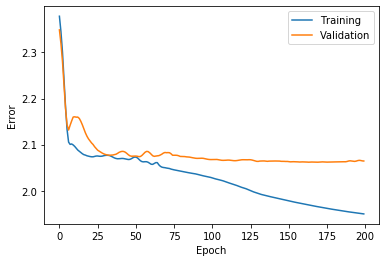

[ErrorViewer]: Se van a clasificar los datos de 'img_encodings_3.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 38.929 %
	[ErrorViewer] PRECISION = 64.789 %
	[ErrorViewer] RECALL = 8.614 %
	[ErrorViewer] F1 SCORE = 15.207 %
	[ErrorViewer] Values are tn,fn,fp,tp = [281, 488, 25, 46] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 39.955 %
	[ErrorViewer] PRECISION = 69.601 %
	[ErrorViewer] RECALL = 9.908 %
	[ErrorViewer] F1 SCORE = 17.346 %
	[ErrorViewer] Values are tn,fn,fp,tp = [2238, 3810, 183, 419] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 36.024 %
	[ErrorViewer] PRECISION = 69.333 %
	[ErrorViewer] RECALL = 9.286 %
	[ErrorViewer] F1 SCORE = 16.378 %
	[ErrorViewer] Values are tn,fn,fp,tp = [247, 508, 23, 52] %


In [341]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

#### Experimento 3.2: 
Se crea un modelo MLP de dos capas, de 50 y 20 neuronas respectivamente.

In [336]:
FILE_IN = 'img_encodings_3.json'
FILE_OUT = 'error_32'
NEURONS = '2 50 20'
ACT_FUNCTION = 'relu'
EPOCH = '200'
LEARNING_COEF = '0.000005'
SEED = '1'

In [337]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

relu finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_32_relu.json'.


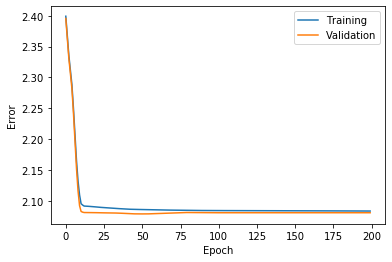

[ErrorViewer]: Se van a clasificar los datos de 'img_encodings_3.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 10.119 %
	[ErrorViewer] PRECISION = 97.183 %
	[ErrorViewer] RECALL = 8.394 %
	[ErrorViewer] F1 SCORE = 15.454 %
	[ErrorViewer] Values are tn,fn,fp,tp = [16, 753, 2, 69] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 10.827 %
	[ErrorViewer] PRECISION = 97.841 %
	[ErrorViewer] RECALL = 9.053 %
	[ErrorViewer] F1 SCORE = 16.573 %
	[ErrorViewer] Values are tn,fn,fp,tp = [131, 5917, 13, 589] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 9.036 %
	[ErrorViewer] PRECISION = 100.0 %
	[ErrorViewer] RECALL = 9.036 %
	[ErrorViewer] F1 SCORE = 16.575 %
	[ErrorViewer] Values are tn,fn,fp,tp = [0, 755, 0, 75] %


In [338]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

#### Experimento 3.3: 
Se crea un modelo MLP de cuatro capas, de 60, 45, 30 y 15 neuronas respectivamente.

In [333]:
FILE_IN = 'img_encodings_3.json'
FILE_OUT = 'error_33'
NEURONS = '4 60 45 30 15'
ACT_FUNCTION = 'relu'
EPOCH = '500'
LEARNING_COEF = '0.0085'
SEED = '1'

In [334]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

relu finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_33_relu.json'.


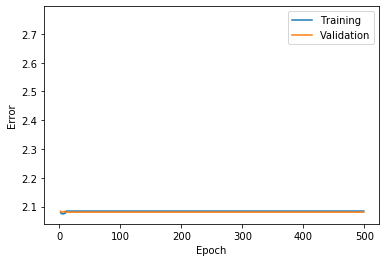

[ErrorViewer]: Se van a clasificar los datos de 'img_encodings_3.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 8.452 %
	[ErrorViewer] PRECISION = 100.0 %
	[ErrorViewer] RECALL = 8.452 %
	[ErrorViewer] F1 SCORE = 15.587 %
	[ErrorViewer] Values are tn,fn,fp,tp = [0, 769, 0, 71] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 9.053 %
	[ErrorViewer] PRECISION = 100.0 %
	[ErrorViewer] RECALL = 9.053 %
	[ErrorViewer] F1 SCORE = 16.602 %
	[ErrorViewer] Values are tn,fn,fp,tp = [0, 6048, 0, 602] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 9.036 %
	[ErrorViewer] PRECISION = 100.0 %
	[ErrorViewer] RECALL = 9.036 %
	[ErrorViewer] F1 SCORE = 16.575 %
	[ErrorViewer] Values are tn,fn,fp,tp = [0, 755, 0, 75] %


In [335]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

### Experimento 4: dataset iris (4 características de entrada y 3 de salida)
#### Experimento 4.1: 
Se crea un modelo MLP de una capa de 4 neuronas.

In [164]:
FILE_IN = 'dataset_iris.json'
FILE_OUT = 'error_iris_1'
NEURONS = '1 4'
ACT_FUNCTION = 'sigmoid'
EPOCH = '5000'
LEARNING_COEF = '0.0001'
SEED = '1'

In [165]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

sigmoid finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_iris_sigmoid.json'.


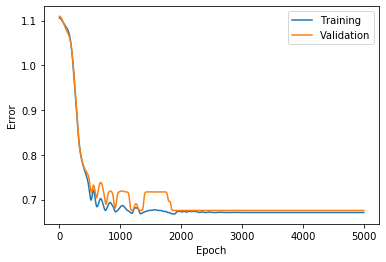

[ErrorViewer]: Se van a clasificar los datos de 'dataset_iris.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 53.333 %
	[ErrorViewer] PRECISION = 53.333 %
	[ErrorViewer] RECALL = 36.364 %
	[ErrorViewer] F1 SCORE = 43.243 %
	[ErrorViewer] Values are tn,fn,fp,tp = [16, 14, 7, 8] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 87.222 %
	[ErrorViewer] PRECISION = 98.333 %
	[ErrorViewer] RECALL = 72.84 %
	[ErrorViewer] F1 SCORE = 83.688 %
	[ErrorViewer] Values are tn,fn,fp,tp = [196, 44, 2, 118] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 86.667 %
	[ErrorViewer] PRECISION = 100.0 %
	[ErrorViewer] RECALL = 71.429 %
	[ErrorViewer] F1 SCORE = 83.333 %
	[ErrorViewer] Values are tn,fn,fp,tp = [24, 6, 0, 15] %


In [166]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

#### Experimento 4.2: 
Se crea un modelo MLP de dos capas de 4 y 3 neuronas respectivamente.

In [195]:
FILE_IN = 'dataset_iris.json'
FILE_OUT = 'error_iris_2'
NEURONS = '2 4 3'
ACT_FUNCTION = 'sigmoid'
EPOCH = '500'
LEARNING_COEF = '0.01'
SEED = '1'

In [196]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

sigmoid finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_iris_2_sigmoid.json'.


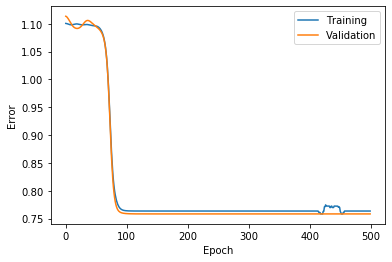

[ErrorViewer]: Se van a clasificar los datos de 'dataset_iris.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 46.667 %
	[ErrorViewer] PRECISION = 60.0 %
	[ErrorViewer] RECALL = 33.333 %
	[ErrorViewer] F1 SCORE = 42.857 %
	[ErrorViewer] Values are tn,fn,fp,tp = [12, 18, 6, 9] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 77.222 %
	[ErrorViewer] PRECISION = 100.0 %
	[ErrorViewer] RECALL = 59.406 %
	[ErrorViewer] F1 SCORE = 74.534 %
	[ErrorViewer] Values are tn,fn,fp,tp = [158, 82, 0, 120] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 77.778 %
	[ErrorViewer] PRECISION = 100.0 %
	[ErrorViewer] RECALL = 60.0 %
	[ErrorViewer] F1 SCORE = 75.0 %
	[ErrorViewer] Values are tn,fn,fp,tp = [20, 10, 0, 15] %


In [197]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

#### Experimento 4.3: 
Se crea un modelo MLP de cuatro capas de 4, 4, 3 y 3 neuronas respectivamente.

In [222]:
FILE_IN = 'dataset_iris.json'
FILE_OUT = 'error_iris_3'
NEURONS = '4 4 4 3 3'
ACT_FUNCTION = 'sigmoid'
EPOCH = '5000'
LEARNING_COEF = '0.0000075'
SEED = '1'

In [223]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

sigmoid finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_iris_3_sigmoid.json'.


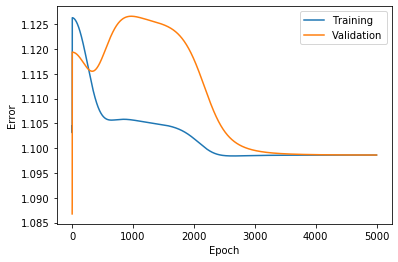

[ErrorViewer]: Se van a clasificar los datos de 'dataset_iris.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 55.556 %
	[ErrorViewer] PRECISION = 33.333 %
	[ErrorViewer] RECALL = 33.333 %
	[ErrorViewer] F1 SCORE = 33.333 %
	[ErrorViewer] Values are tn,fn,fp,tp = [20, 10, 10, 5] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 56.111 %
	[ErrorViewer] PRECISION = 34.167 %
	[ErrorViewer] RECALL = 34.167 %
	[ErrorViewer] F1 SCORE = 34.167 %
	[ErrorViewer] Values are tn,fn,fp,tp = [161, 79, 79, 41] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 51.111 %
	[ErrorViewer] PRECISION = 26.667 %
	[ErrorViewer] RECALL = 26.667 %
	[ErrorViewer] F1 SCORE = 26.667 %
	[ErrorViewer] Values are tn,fn,fp,tp = [19, 11, 11, 4] %


In [224]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

#### Experimento 4.4: 
Se crea un modelo MLP de una capa de 4 neuronas con la función tanh.

In [228]:
FILE_IN = 'dataset_iris.json'
FILE_OUT = 'error_iris_4'
NEURONS = '1 4'
ACT_FUNCTION = 'tanh'
EPOCH = '1000'
LEARNING_COEF = '0.05'
SEED = '1'

In [229]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

tanh finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_iris_4_tanh.json'.


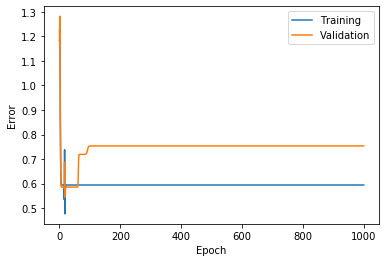

[ErrorViewer]: Se van a clasificar los datos de 'dataset_iris.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 46.667 %
	[ErrorViewer] PRECISION = 60.0 %
	[ErrorViewer] RECALL = 33.333 %
	[ErrorViewer] F1 SCORE = 42.857 %
	[ErrorViewer] Values are tn,fn,fp,tp = [12, 18, 6, 9] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 77.222 %
	[ErrorViewer] PRECISION = 100.0 %
	[ErrorViewer] RECALL = 59.406 %
	[ErrorViewer] F1 SCORE = 74.534 %
	[ErrorViewer] Values are tn,fn,fp,tp = [158, 82, 0, 120] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 71.111 %
	[ErrorViewer] PRECISION = 93.333 %
	[ErrorViewer] RECALL = 53.846 %
	[ErrorViewer] F1 SCORE = 68.293 %
	[ErrorViewer] Values are tn,fn,fp,tp = [18, 12, 1, 14] %


In [230]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

#### Experimento 4.5: 
Se crea un modelo MLP de una capa de 4 neuronas con la función relu.

In [306]:
FILE_IN = 'dataset_iris.json'
FILE_OUT = 'error_iris_5'
NEURONS = '1 4'
ACT_FUNCTION = 'relu'
EPOCH = '5000'
LEARNING_COEF = '0.001'
SEED = '1'

In [307]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

relu finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_iris_5_relu.json'.


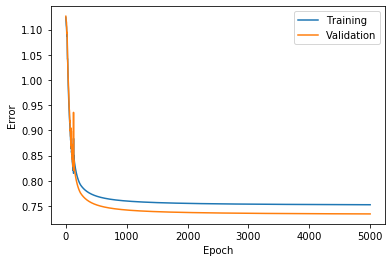

[ErrorViewer]: Se van a clasificar los datos de 'dataset_iris.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 42.222 %
	[ErrorViewer] PRECISION = 93.333 %
	[ErrorViewer] RECALL = 35.897 %
	[ErrorViewer] F1 SCORE = 51.852 %
	[ErrorViewer] Values are tn,fn,fp,tp = [5, 25, 1, 14] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 54.444 %
	[ErrorViewer] PRECISION = 100.0 %
	[ErrorViewer] RECALL = 42.254 %
	[ErrorViewer] F1 SCORE = 59.406 %
	[ErrorViewer] Values are tn,fn,fp,tp = [76, 164, 0, 120] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 55.556 %
	[ErrorViewer] PRECISION = 100.0 %
	[ErrorViewer] RECALL = 42.857 %
	[ErrorViewer] F1 SCORE = 60.0 %
	[ErrorViewer] Values are tn,fn,fp,tp = [10, 20, 0, 15] %


In [308]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)

#### Experimento 4.6: 
Se crea un modelo MLP de dos capas de 4, 4 neuronas por capa respectivamente, con la función relu.

In [285]:
FILE_IN = 'dataset_iris.json'
FILE_OUT = 'error_iris_6'
NEURONS = '2 4 4'
ACT_FUNCTION = 'relu'
EPOCH = '10000'
LEARNING_COEF = '0.00000005'
SEED = '1'

In [286]:
os.system('./main.out encodes/' + FILE_IN + ' errors/' + FILE_OUT + ' ' + NEURONS + ' ' + ACT_FUNCTION + ' ' + EPOCH + ' ' + LEARNING_COEF + ' 0 ' + SEED)

relu finish


0

[ErrorViewer]: Se van a graficar los datos de 'error_iris_6_relu.json'.


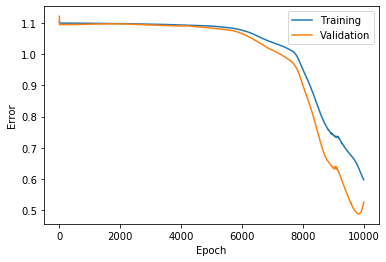

[ErrorViewer]: Se van a clasificar los datos de 'dataset_iris.json'.
[ErrorViewer] On Test:
	[ErrorViewer] ACCURACY = 64.444 %
	[ErrorViewer] PRECISION = 53.333 %
	[ErrorViewer] RECALL = 47.059 %
	[ErrorViewer] F1 SCORE = 50.0 %
	[ErrorViewer] Values are tn,fn,fp,tp = [21, 9, 7, 8] %
[ErrorViewer] On Train:
	[ErrorViewer] ACCURACY = 77.222 %
	[ErrorViewer] PRECISION = 67.5 %
	[ErrorViewer] RECALL = 65.323 %
	[ErrorViewer] F1 SCORE = 66.393 %
	[ErrorViewer] Values are tn,fn,fp,tp = [197, 43, 39, 81] %
[ErrorViewer] On Validation:
	[ErrorViewer] ACCURACY = 82.222 %
	[ErrorViewer] PRECISION = 73.333 %
	[ErrorViewer] RECALL = 73.333 %
	[ErrorViewer] F1 SCORE = 73.333 %
	[ErrorViewer] Values are tn,fn,fp,tp = [26, 4, 4, 11] %


In [287]:
ev = ErrorViewer(FILE_OUT + '_' + ACT_FUNCTION)
ev.calc_error()
ev.perf_analysis(FILE_IN)